# Feature Extraction in Audio
## This notebook outlines the concepts behind extracting features from audio

### Feature Extraction

Extracting a set of features that are informative with respect to the desired properties of the original audio data

Low-level features to construct a higher-level of understanding

Need to extract audio features capable of discriminating between different audio classes i.e. speakers, emotions, genres

### Features
- Short-term Windowing (Framing)
    - Energy
    - Spectral Centroid
- Mid-term features
- Spectrogram
- Zero Crossings
- Spectral Rolloff
- MFCC

### Import the library

In [1]:
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import numpy as np 
import plotly.graph_objects as go 
import plotly
import IPython
from matplotlib import pyplot as plt

### Read Audio file

In [2]:
fs, s = aIO.read_audio_file("count.wav")

### Play the audio file

In [3]:
IPython.display.display(IPython.display.Audio("count.wav"))

### Duration of the audio file

In [4]:
duration = len(s) / float(fs)
print(f'duration = {duration} seconds')

duration = 5.868 seconds


### Extract short-term features using a 50msec non-overlapping windows

### Extract features
- Use feature_extraction( )
    - **signal**:         the input signal samples
    - **sampling_rate**:  the sampling freq (in Hz)
    - **window**:         the short-term window size (in samples)
    - **step**:           the short-term window step (in samples)
    - **deltas**:         (opt) True/False if delta features are to be computed
- RETURNS
    - **features** (numpy.ndarray):        contains features (n_feats x numOfShortTermWindows)                     
    - **feature_names** (numpy.ndarray):   contains feature names (n_feats x numOfShortTermWindows)

In [5]:
win, step = 0.050, 0.050

In [6]:
[f, fn] = aF.feature_extraction(s, 
                                fs, 
                                int(fs * win), 
                                int(fs * step)
)

### How many frames

In [7]:
print(f'{f.shape[1]} frames')

117 frames


### How many features

In [8]:
print(f"{f.shape[0]} short-term features")

68 short-term features


### Feature Names

In [9]:
print('Feature names:')
for i, nam in enumerate(fn):
    print(f'{i}:{nam}')

Feature names:
0:zcr
1:energy
2:energy_entropy
3:spectral_centroid
4:spectral_spread
5:spectral_entropy
6:spectral_flux
7:spectral_rolloff
8:mfcc_1
9:mfcc_2
10:mfcc_3
11:mfcc_4
12:mfcc_5
13:mfcc_6
14:mfcc_7
15:mfcc_8
16:mfcc_9
17:mfcc_10
18:mfcc_11
19:mfcc_12
20:mfcc_13
21:chroma_1
22:chroma_2
23:chroma_3
24:chroma_4
25:chroma_5
26:chroma_6
27:chroma_7
28:chroma_8
29:chroma_9
30:chroma_10
31:chroma_11
32:chroma_12
33:chroma_std
34:delta zcr
35:delta energy
36:delta energy_entropy
37:delta spectral_centroid
38:delta spectral_spread
39:delta spectral_entropy
40:delta spectral_flux
41:delta spectral_rolloff
42:delta mfcc_1
43:delta mfcc_2
44:delta mfcc_3
45:delta mfcc_4
46:delta mfcc_5
47:delta mfcc_6
48:delta mfcc_7
49:delta mfcc_8
50:delta mfcc_9
51:delta mfcc_10
52:delta mfcc_11
53:delta mfcc_12
54:delta mfcc_13
55:delta chroma_1
56:delta chroma_2
57:delta chroma_3
58:delta chroma_4
59:delta chroma_5
60:delta chroma_6
61:delta chroma_7
62:delta chroma_8
63:delta chroma_9
64:delta chrom

### Plot Short-term energy

### Time

In [10]:
time = np.arange(0, duration - step, win) 

In [11]:
time

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45,
       5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 ])

# Energy

In [12]:
energy = f[fn.index('energy'), :]

In [13]:
energy

array([1.17155618e-06, 2.26103599e-06, 5.89380807e-03, 6.50184072e-02,
       2.22809121e-01, 2.59832820e-01, 7.39481772e-02, 1.98293280e-02,
       6.66982183e-03, 2.28102470e-04, 3.18341265e-05, 1.94780117e-05,
       6.21101384e-06, 4.92199972e-04, 3.20742421e-02, 2.48234298e-01,
       1.29339961e-01, 1.25411872e-02, 1.99217639e-03, 8.50118931e-05,
       1.40488838e-05, 4.09790175e-05, 2.53955259e-06, 9.40652196e-06,
       5.61618655e-04, 4.86555207e-02, 7.40795059e-02, 1.77944546e-01,
       1.14977300e-01, 1.47876361e-02, 2.14657708e-04, 2.25934050e-05,
       1.97537854e-05, 7.26869536e-06, 1.36063761e-05, 1.01509847e-04,
       3.15780923e-02, 2.09567932e-01, 2.29799191e-01, 8.59289092e-02,
       6.53738523e-02, 2.53867402e-02, 2.84708575e-03, 4.74363145e-05,
       2.15760611e-05, 4.91381092e-05, 1.80965370e-06, 4.22031213e-05,
       1.59057760e-03, 1.35141334e-01, 1.91044977e-01, 1.01629210e-01,
       6.49041638e-02, 1.62533299e-03, 6.39477286e-04, 2.02550210e-04,
      

### Plot Time Vs Energy

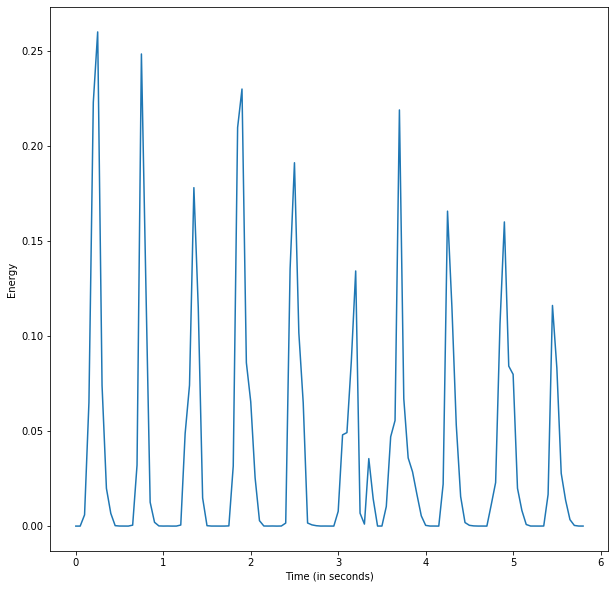

In [14]:
plt.figure(figsize=(10,10))
plt.xlabel("Time (in seconds)")
plt.ylabel("Energy")
plt.plot(time, energy)

# Spectral Centroid
### Spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound


In [15]:
spectral_centroid = f[fn.index('spectral_centroid'), :]

### Plot Time Vs Spectral Centroid

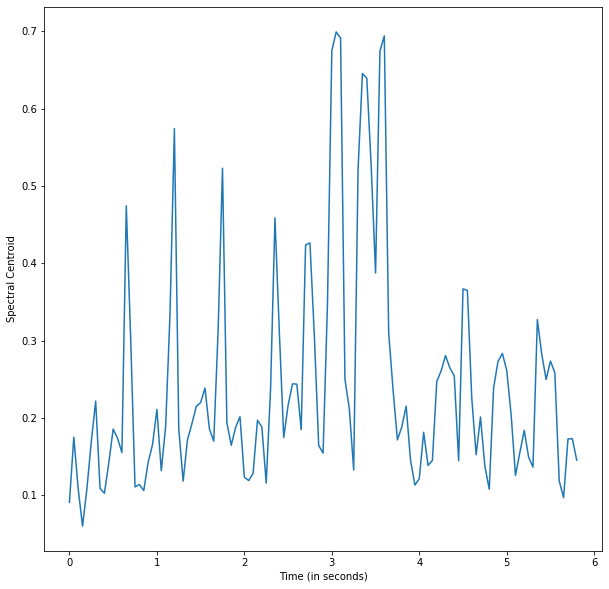

In [16]:
plt.figure(figsize=(10,10))
plt.xlabel("Time (in seconds)")
plt.ylabel("Spectral Centroid")
plt.plot(time, spectral_centroid)

### Use librosa library

In [17]:
import sklearn
import librosa
import librosa.display

### Read the audio file

In [18]:
audio_path = 'count.wav'
x , sr = librosa.load(audio_path)

### Compute Spectral Centroids

In [19]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape)

(253,)


### Computing the time variable for visualization

In [20]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

### Normalising the spectral centroid for visualisation

In [21]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

### Plotting the Spectral Centroid along the waveform

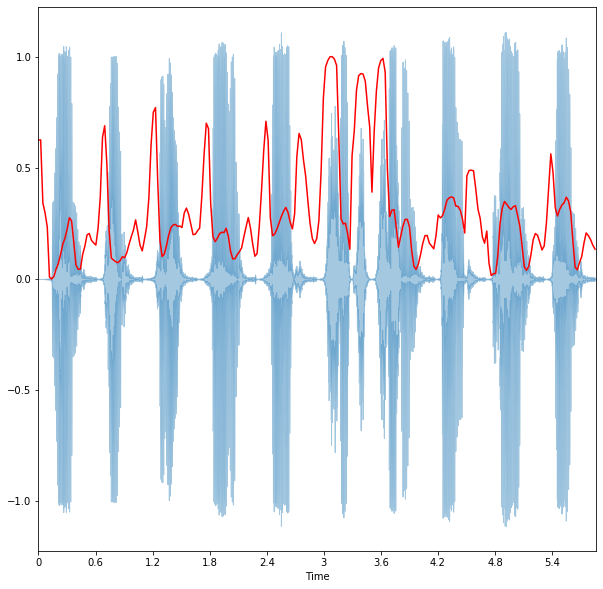

In [23]:
plt.figure(figsize=(10, 10))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

# Mid-term features

### Steps
- Import the library
- Extract mid_features

### Import the library

In [24]:
from pyAudioAnalysis import MidTermFeatures as aF

### Extract features
- Use mid_feature_extraction( )
    - signal
    - sampling_rate
    - mid_window
    - mid_step
    - short_window
    - short_step

In [25]:
mt, st, mt_n = aF.mid_feature_extraction(s, 
                                         fs, 
                                         1 * fs, 
                                         1 * fs, 
                                         0.05 * fs, 
                                         0.05 * fs
)

### Duration, Short-term features, Segment features

In [26]:
print(f'signal duration {len(s)/fs} seconds')
print(f'{st.shape[1]} {st.shape[0]}-D short-term feature vectors extracted')
print(f'{mt.shape[1]} {mt.shape[0]}-D segment feature statistic vectors extracted')

signal duration 5.868 seconds
117 68-D short-term feature vectors extracted
6 136-D segment feature statistic vectors extracted


### Mid-term feature names

In [27]:
print('mid-term feature names')
for i, mi in enumerate(mt_n):
    print(f'{i}:{mi}')

mid-term feature names
0:zcr_mean
1:energy_mean
2:energy_entropy_mean
3:spectral_centroid_mean
4:spectral_spread_mean
5:spectral_entropy_mean
6:spectral_flux_mean
7:spectral_rolloff_mean
8:mfcc_1_mean
9:mfcc_2_mean
10:mfcc_3_mean
11:mfcc_4_mean
12:mfcc_5_mean
13:mfcc_6_mean
14:mfcc_7_mean
15:mfcc_8_mean
16:mfcc_9_mean
17:mfcc_10_mean
18:mfcc_11_mean
19:mfcc_12_mean
20:mfcc_13_mean
21:chroma_1_mean
22:chroma_2_mean
23:chroma_3_mean
24:chroma_4_mean
25:chroma_5_mean
26:chroma_6_mean
27:chroma_7_mean
28:chroma_8_mean
29:chroma_9_mean
30:chroma_10_mean
31:chroma_11_mean
32:chroma_12_mean
33:chroma_std_mean
34:delta zcr_mean
35:delta energy_mean
36:delta energy_entropy_mean
37:delta spectral_centroid_mean
38:delta spectral_spread_mean
39:delta spectral_entropy_mean
40:delta spectral_flux_mean
41:delta spectral_rolloff_mean
42:delta mfcc_1_mean
43:delta mfcc_2_mean
44:delta mfcc_3_mean
45:delta mfcc_4_mean
46:delta mfcc_5_mean
47:delta mfcc_6_mean
48:delta mfcc_7_mean
49:delta mfcc_8_mean
50

# Spectrogram

### Steps
- Import the **librosa** library
- Load the audio file
- Compute Frequencies using FT
- Compute Amplitude
- Plot Frequencies Vs Amplitude as Spectrogram

### Import the library

In [28]:
import librosa
import librosa.display
from matplotlib import pyplot as plt

### Load the audio file

In [29]:
audio_path = 'count.wav'
x , sr = librosa.load(audio_path)

#### Sampling rate

In [30]:
print(sr)

22050


### Compute Frequencies

In [31]:
X = librosa.stft(x)
X.shape

(1025, 253)

### Compute Amplitude

In [32]:
Xdb = librosa.amplitude_to_db(abs(X))
Xdb.shape

(1025, 253)

### Display Spectrogram

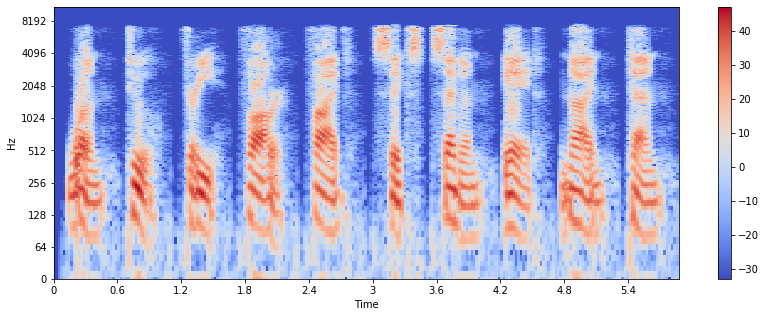

In [33]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Zero Crossings

### Steps
- Import the library
- Read the Audio file
- Compute Zero Crossings
- Plot zero crossings

### Import the library

In [34]:
import librosa
import librosa.display

### Read the audio file

In [35]:
audio_path = 'count.wav'
x , sr = librosa.load(audio_path)

### Plot the signal

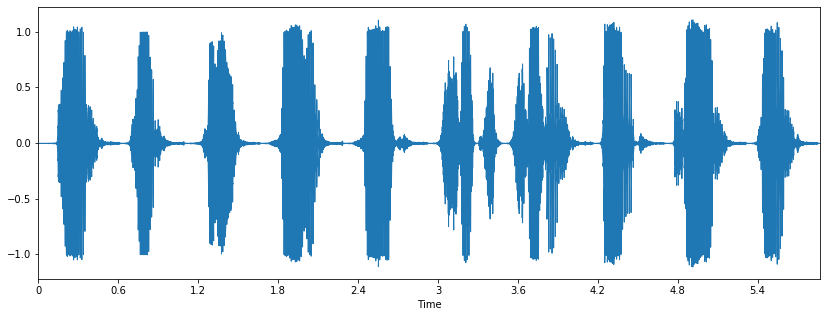

In [36]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Compute Zero Crossings

In [37]:
zero_crossings = librosa.zero_crossings(x, pad=False)

In [38]:
zero_crossings

array([False, False,  True, ..., False, False, False])

In [39]:
sum(zero_crossings)

15198

# Spectral Rolloff

In [40]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]

### Plot Spectral Rolloff

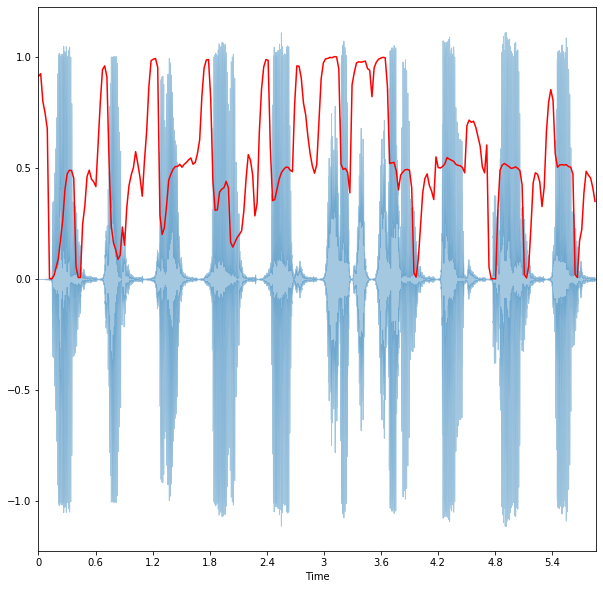

In [41]:
plt.figure(figsize=(10, 10))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Spectral Centroids

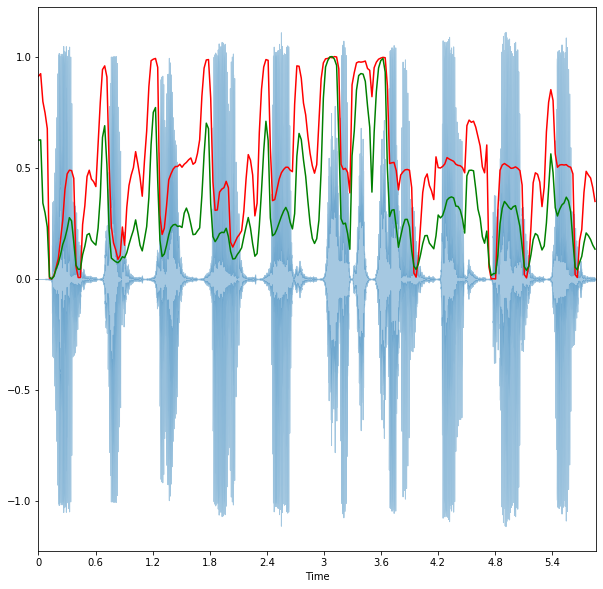

In [42]:
plt.figure(figsize=(10, 10))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.plot(t, normalize(spectral_centroids), color='g')

# MFCC

### Compute MFCC

In [43]:
mfccs = librosa.feature.mfcc(x, sr=sr)

In [44]:
print(mfccs.shape)

(20, 253)


### Plot MFCC

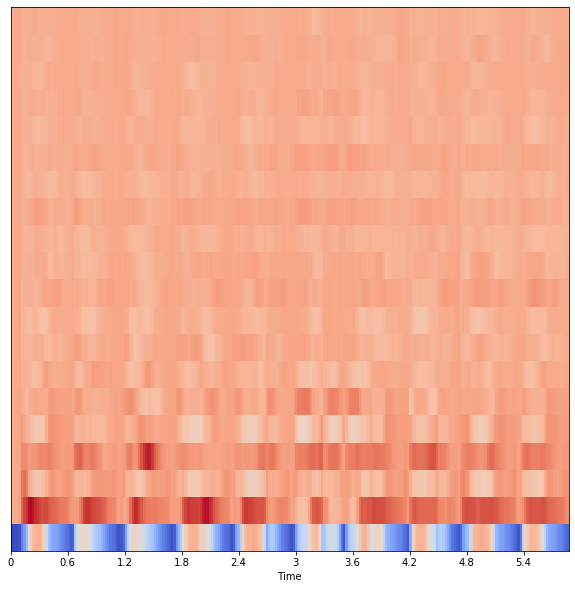

In [45]:
plt.figure(figsize=(10, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Chromagram

### Compute Chromagram

In [46]:
chroma = librosa.feature.chroma_stft(x, sr=sr)

### Plot Chromagram

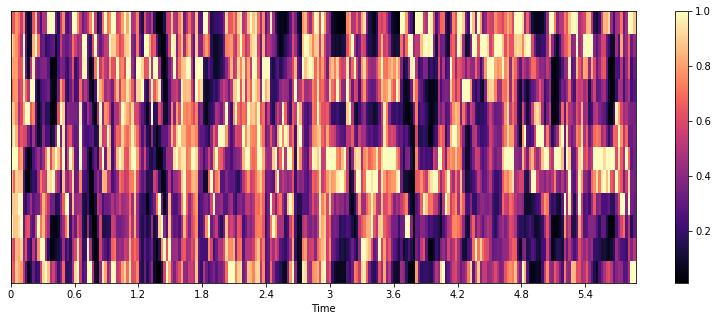

In [49]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, sr=sr, x_axis='time')
plt.colorbar()